<div style="display:block">
    <div style="width: 20%; display: inline-block; text-align: left;">
    </div>
    <div style="width: 59%; display: inline-block">
        <h1  style="text-align: center">Test: Python</h1><br>
        <h2  style="text-align: center">Calculating Average Throughput</h2><br>
         <div style="width: 90%; text-align: center; display: inline-block;"><i>Submission by:</i> <strong>Anjana Ranjan</strong> </div>
    </div>
    <div style="width: 20%; text-align: right; display: inline-block;">
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Created: </i>
            <time datetime="Enter Date" pubdate>May, 2019</time>
        </div>
    </div>
</div>

Import the packages used

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing the data provided and labelling the columns 

In [2]:
data = pd.read_csv('throughputdata.txt', sep=" ", header=None)
data.columns = ["Country", "ASN", "Time", "o", "Metric A", "Co Server", "Bytes", "Send/Time"]
data

,Country,ASN,Time,o,Metric A,Co Server,Bytes,Send/Time
0,de,31334,[07/Aug/2015:20:30:01,+0000],76410,302,435,0.326
1,pl,50231,[07/Aug/2015:20:30:01,+0000],126746,200,7400,0.000
2,gr,3329,[07/Aug/2015:20:30:01,+0000],126474,206,17711,0.000
3,tr,9121,[07/Aug/2015:20:30:02,+0000],76406,200,19589,0.000
4,se,3301,[08/Aug/2015:16:29:00,+0000],76406,200,17960,0.000
5,kz,9198,[08/Aug/2015:16:30:02,+0000],76406,200,2403,0.000
6,ch,6830,[08/Aug/2015:16:32:22,+0000],76406,200,16099,0.000
7,rs,21246,[09/Aug/2015:17:13:03,+0000],76406,200,64127,0.000
8,rs,21246,[09/Aug/2015:17:13:55,+0000],76406,200,64704,0.000
9,ro,9050,[09/Aug/2015:20:30:02,+0000],126518,206,302932,0.504


Getting the data in the required format

In [3]:
data["Time Stamp"]= data["Time"]+data["o"]
del data["Time"]
del data["o"]
data= data[["Country", "ASN", "Time Stamp", "Metric A", "Co Server", "Bytes", "Send/Time"]]
data

,Country,ASN,Time Stamp,Metric A,Co Server,Bytes,Send/Time
0,de,31334,[07/Aug/2015:20:30:01+0000],76410,302,435,0.326
1,pl,50231,[07/Aug/2015:20:30:01+0000],126746,200,7400,0.000
2,gr,3329,[07/Aug/2015:20:30:01+0000],126474,206,17711,0.000
3,tr,9121,[07/Aug/2015:20:30:02+0000],76406,200,19589,0.000
4,se,3301,[08/Aug/2015:16:29:00+0000],76406,200,17960,0.000
5,kz,9198,[08/Aug/2015:16:30:02+0000],76406,200,2403,0.000
6,ch,6830,[08/Aug/2015:16:32:22+0000],76406,200,16099,0.000
7,rs,21246,[09/Aug/2015:17:13:03+0000],76406,200,64127,0.000
8,rs,21246,[09/Aug/2015:17:13:55+0000],76406,200,64704,0.000
9,ro,9050,[09/Aug/2015:20:30:02+0000],126518,206,302932,0.504


### Steps to calculate the throughput:
First and foremost, create a coloumn called throughput and perform the following calculations:
#### Step 1
* Convert the window size from bytes to bits by multiplying the number of bytes by 8 (1 byte = 8 bits)
#### Step 2
* Divide the window size by the latency (Send/Time)
#### Step 3
* Convert the result from step 2 to megabits per second by dividing the result by 1,000,000

In [10]:
data1= data
data1['Throughput'] = (data['Bytes']*8/ data['Send/Time'])/1000000
data1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,ASN,Time Stamp,Metric A,Co Server,Bytes,Send/Time,Throughput
0,de,31334,[07/Aug/2015:20:30:01+0000],76410,302,435,0.326,0.010675
1,pl,50231,[07/Aug/2015:20:30:01+0000],126746,200,7400,0.000,inf
2,gr,3329,[07/Aug/2015:20:30:01+0000],126474,206,17711,0.000,inf
3,tr,9121,[07/Aug/2015:20:30:02+0000],76406,200,19589,0.000,inf
4,se,3301,[08/Aug/2015:16:29:00+0000],76406,200,17960,0.000,inf
5,kz,9198,[08/Aug/2015:16:30:02+0000],76406,200,2403,0.000,inf
6,ch,6830,[08/Aug/2015:16:32:22+0000],76406,200,16099,0.000,inf
7,rs,21246,[09/Aug/2015:17:13:03+0000],76406,200,64127,0.000,inf
8,rs,21246,[09/Aug/2015:17:13:55+0000],76406,200,64704,0.000,inf
9,ro,9050,[09/Aug/2015:20:30:02+0000],126518,206,302932,0.504,4.808444


### Grouping the data based on ASN by calculating average throughput for each ASN

In [29]:
data2= (data1.groupby('ASN').Throughput.mean())
data2.coloumns= ["ASN", "Throughput"]
data2

ASN
1901     12.043268
3301           inf
3320     12.184800
3329           inf
6830           inf
8447           inf
9050      4.808444
9121           inf
9198           inf
12635          inf
15685     8.998243
21246          inf
31334     0.010675
50231          inf
Name: Throughput, dtype: float64

### Grouping the data based on Co Server by calculating average throughput for each Co Server

In [31]:
data3= (data1.groupby('Co Server').Throughput.mean())
data3.coloumns= ["ASN", "Throughput"]
data3

Co Server
200         inf
206         inf
302    0.010675
Name: Throughput, dtype: float64

### Visualizing ASN vs Avg. throughput

Text(0, 0.5, 'Avg. Throughput')

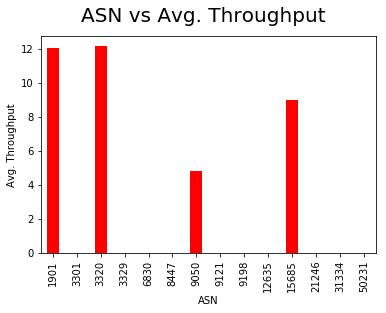

In [27]:
p1= data2.plot(kind="bar", color = 'red')
plt.suptitle('ASN vs Avg. Throughput', fontsize=20)
plt.xlabel('ASN')
plt.ylabel('Avg. Throughput')

### Visualizing Co Server vs Avg. throughput

Text(0, 0.5, 'Avg. Throughput')

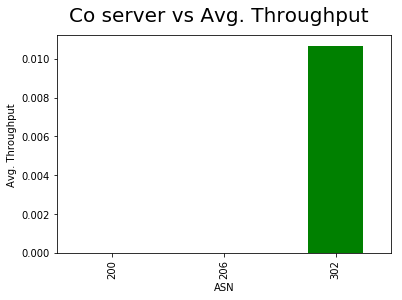

In [25]:
p2= data3.plot(kind="bar", color = 'green')
plt.suptitle('Co server vs Avg. Throughput', fontsize=20)
plt.xlabel('ASN')
plt.ylabel('Avg. Throughput')

### Plotting by combining both parameters

Text(0, 0.5, 'Avg. Throughput')

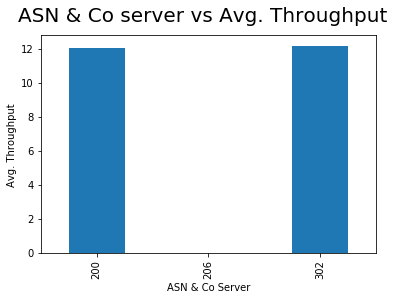

In [28]:
data2.plot(kind="bar")
data3.plot(kind="bar")
plt.suptitle('ASN & Co server vs Avg. Throughput', fontsize=20)
plt.xlabel('ASN & Co Server')
plt.ylabel('Avg. Throughput')


Few other keys that the data can be grouped by are:
   * Country
   * Time Stamp
   
(Values in these keys occur more than once)